Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale
%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_spmv.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

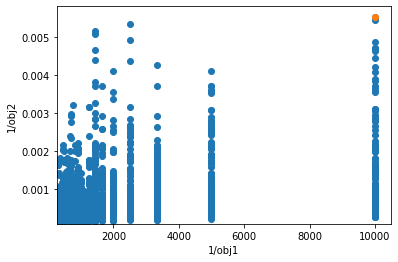

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


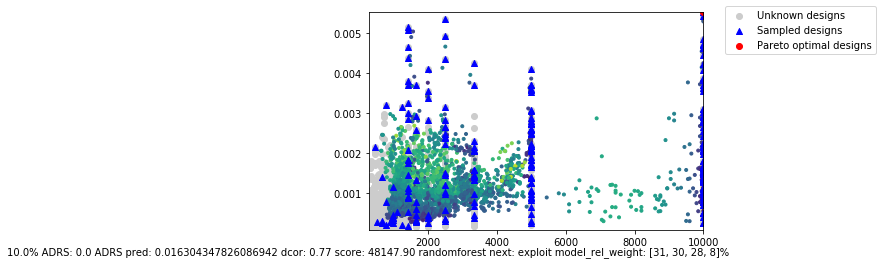

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 846, 1985, 1446,  319,  354, 1728,   79,   40,   89,   84, 1653,
       2144,  449,  450,  439,   83,   80,   81,   82,   75, 1916,  421,
       1636,   76,  579, 1729, 1659, 1637,  114,  115,    5, 1640,   13,
        144,  130,  122,    0,    8, 1658,  121,   36, 1068,  545, 1096,
       1071,  129,   41,  546, 1076,    2,    1,  117, 1709, 1128, 1072,
       1098,  262, 1641,  116,    6, 1120, 1069,  118,    3,  124,  123,
        126,  125, 1087,  548, 1675, 1084, 1088, 1651,    4,    7, 1139,
       1083, 1134, 1657,  556,  119, 1110, 2132,  550, 1638,  146, 1647,
       1678,   17,  120,  132,  147,   37,  134, 1662,  757,  547,  448,
         15,  127,  145,  994,    9,  135, 1335, 1347,  563, 1079,  540,
        557,  726,   42,  587,  581,  141,  447, 1152, 1517,  446,  543,
       1646,  143, 2085,  584,  549,  139, 1704,  442, 1958, 1132, 1095,
       1348,  592, 1663,  256, 1073, 1895,  553,  267,  293,  274,  265,
         43,   38,  588,  298,  128,  297,  131,  1